## #01 - Passos iniciais

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Dataset 1: Lichess
## Possui informações sobre mais de 20 mil partidas de xadrez no site lichess.com

lichess = pd.read_csv('./datasets/Chess Game Dataset (Lichess)/games.csv')
lichess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [19]:
## Dataset 2: FIDE 2022
## Possui informações sobre todos os jogadores registrados na Federação Internacional de Xadrez (FIDE)

fide = pd.read_csv('./datasets/International Chess Statistics 2022/Complete_Players_Database.csv')
fide

C:\Users\PC\AppData\Local\Temp/ipykernel_7668/223672963.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  fide = pd.read_csv('./datasets/International Chess Statistics 2022/Complete_Players_Database.csv')


,Country Rank,Name,Title,Country,FIDE,Age,K-factor
0,1,"Mirzaad, S.wahabuddin",FM,Afghanistan,1999.0,35,20
1,2,"Rahmani, Asef",unranked/unrated,Afghanistan,1871.0,49,20
2,3,"Sarwari, Hamidullah",unranked/unrated,Afghanistan,1866.0,33,20
3,4,"Sakhawaty, Sepehr",unranked/unrated,Afghanistan,1846.0,19,20
4,5,"Jamshedy, Mohammad Ismail",unranked/unrated,Afghanistan,1790.0,78,20
...,...,...,...,...,...,...,...
175353,155,"Mafukidze, Ruvimbo",unranked/unrated,Zimbabwe,1056.0,24,40
175354,156,Nyarenda Miranda,unranked/unrated,Zimbabwe,1045.0,15,40
175355,157,"Gandiwa, Ellagia",unranked/unrated,Zimbabwe,1029.0,34,40
175356,158,ASHANTI KUVIMBA,unranked/unrated,Zimbabwe,1028.0,18,40


### Limpeza prévia de alguns dados

In [20]:
## A coluna FIDE, que deveria abrigar apenas o valor do rating dos jogadores, possui linhas com informações não numéricas
## Isso dificulta o processo de ordenação dos jogadores por rating

## Algumas linhas possuem números em formato string
## Outras linhas contém 'unranked/unrated'

## Esses jogadores sem rating não nos interessam para esta análise

## Inicialmente, retiraremos todas as linhas com 'unranked/unrated' em fide.FIDE

fide = fide[fide['FIDE'] != 'unranked/unrated']

In [21]:
## O próximo passo é transformar todos os números em float, possibilitando a ordenação da coluna FIDE

fide = fide.astype({'FIDE':float})
fide

,Country Rank,Name,Title,Country,FIDE,Age,K-factor
0,1,"Mirzaad, S.wahabuddin",FM,Afghanistan,1999.0,35,20
1,2,"Rahmani, Asef",unranked/unrated,Afghanistan,1871.0,49,20
2,3,"Sarwari, Hamidullah",unranked/unrated,Afghanistan,1866.0,33,20
3,4,"Sakhawaty, Sepehr",unranked/unrated,Afghanistan,1846.0,19,20
4,5,"Jamshedy, Mohammad Ismail",unranked/unrated,Afghanistan,1790.0,78,20
...,...,...,...,...,...,...,...
175353,155,"Mafukidze, Ruvimbo",unranked/unrated,Zimbabwe,1056.0,24,40
175354,156,Nyarenda Miranda,unranked/unrated,Zimbabwe,1045.0,15,40
175355,157,"Gandiwa, Ellagia",unranked/unrated,Zimbabwe,1029.0,34,40
175356,158,ASHANTI KUVIMBA,unranked/unrated,Zimbabwe,1028.0,18,40


## #02 - Exploração inicial

### Medidas de centralidade e dispersão

#### Dataset 1: Lichess

In [22]:
## Usaremos apenas estas três colunas

lichess[['turns', 'white_rating', 'black_rating']].describe()

,turns,white_rating,black_rating
count,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987
std,33.570585,291.253376,291.036126
min,1.000000,784.000000,789.000000
25%,37.000000,1398.000000,1391.000000
50%,55.000000,1567.000000,1562.000000
75%,79.000000,1793.000000,1784.000000
max,349.000000,2700.000000,2723.000000


#### Dataset 2: FIDE 2022

In [23]:
fide.describe()

## Jogador de 970 anos?

,Country Rank,FIDE,Age,K-factor
count,158685.000000,158685.000000,158685.000000,158685.000000
mean,2683.619536,1617.732740,35.813486,29.756026
std,3211.374230,359.149506,20.492701,10.352908
min,1.000000,1001.000000,6.000000,10.000000
25%,422.000000,1322.000000,18.000000,20.000000
50%,1411.000000,1612.000000,30.000000,20.000000
75%,3538.000000,1890.000000,53.000000,40.000000
max,14363.000000,2864.100000,970.000000,40.000000


### Boxplots

#### Dataset 1: Lichess

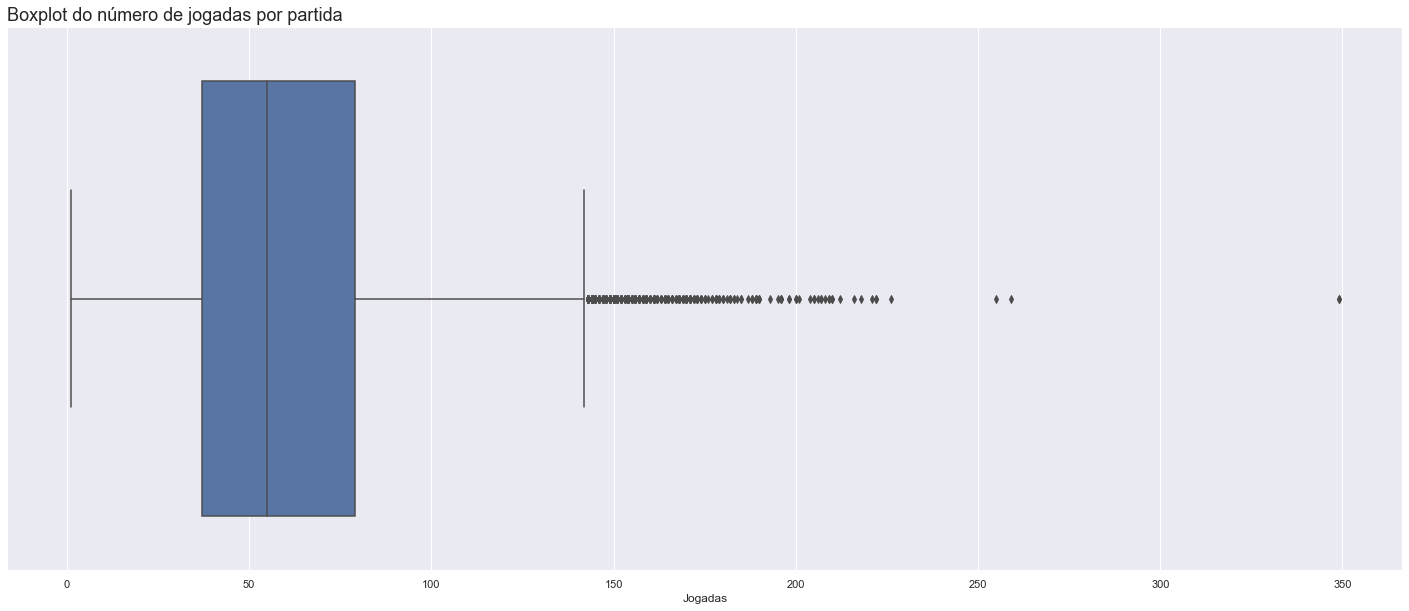

In [24]:
ax = sns.boxplot(data=lichess, x = 'turns')
ax.set_title('Boxplot do número de jogadas por partida', loc='left', fontsize=18)
ax.set_xlabel('Jogadas')
ax.figure.set_size_inches(25,10)

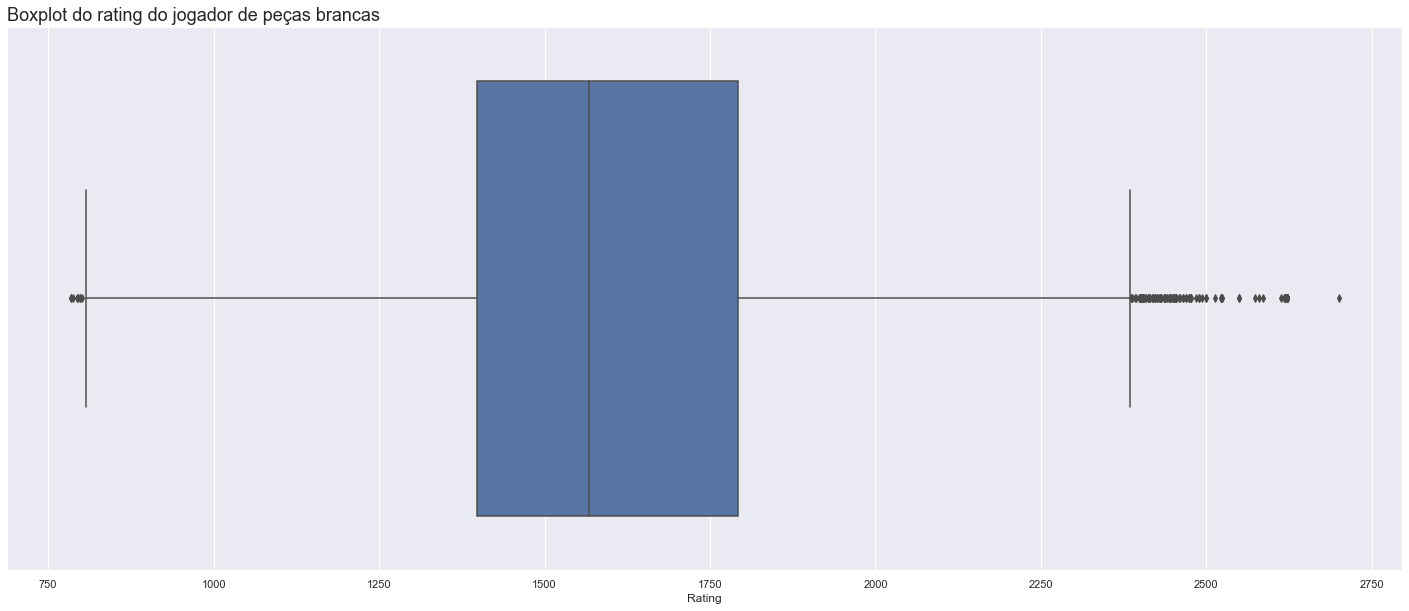

In [25]:
ax = sns.boxplot(data=lichess, x = 'white_rating')
ax.set_title('Boxplot do rating do jogador de peças brancas', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

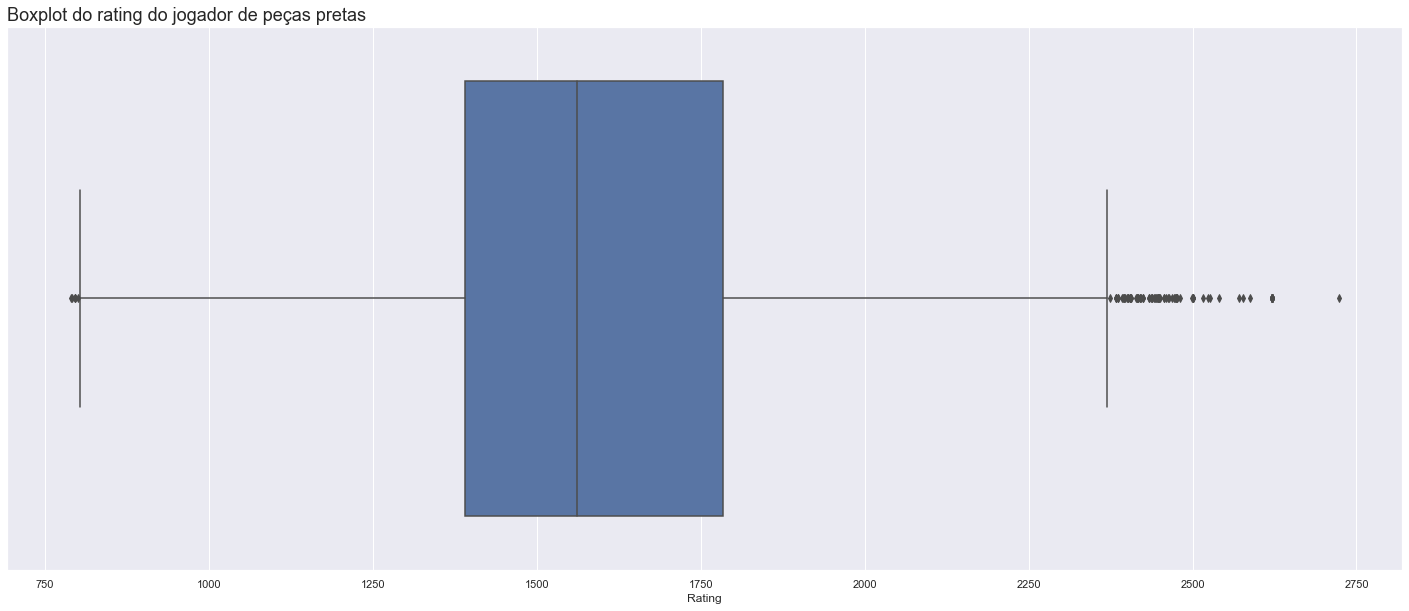

In [26]:
ax = sns.boxplot(data=lichess, x = 'black_rating')
ax.set_title('Boxplot do rating do jogador de peças pretas', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

#### Dataset 2: FIDE 2022

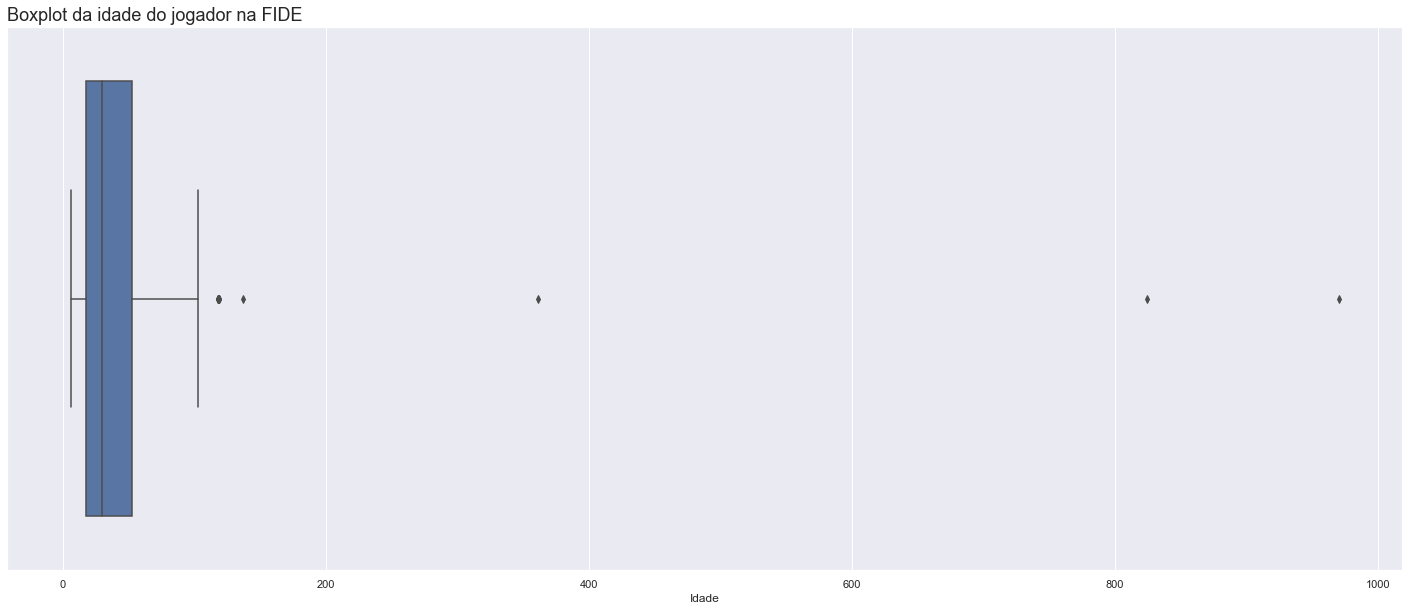

In [27]:
ax = sns.boxplot(data=fide, x='Age')
ax.set_title('Boxplot da idade do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Idade')
ax.figure.set_size_inches(25,10)

## O boxplot parece muito achatado
## Isso se deve aos outliers com idades muito elevadas, acima dos 100 anos

In [28]:
## Vamos resolver o problema das idades muito elevadas
## Qual é a idade do jogador de xadrez mais velho em atividade?

## 100 anos!  https://www.chess.com/pt-BR/news/view/yuri-averbakh-100-anos

## Vamos utilizar apenas os jogadores com idades abaixo dos 100 anos

fide = fide[fide['Age'] < 100]

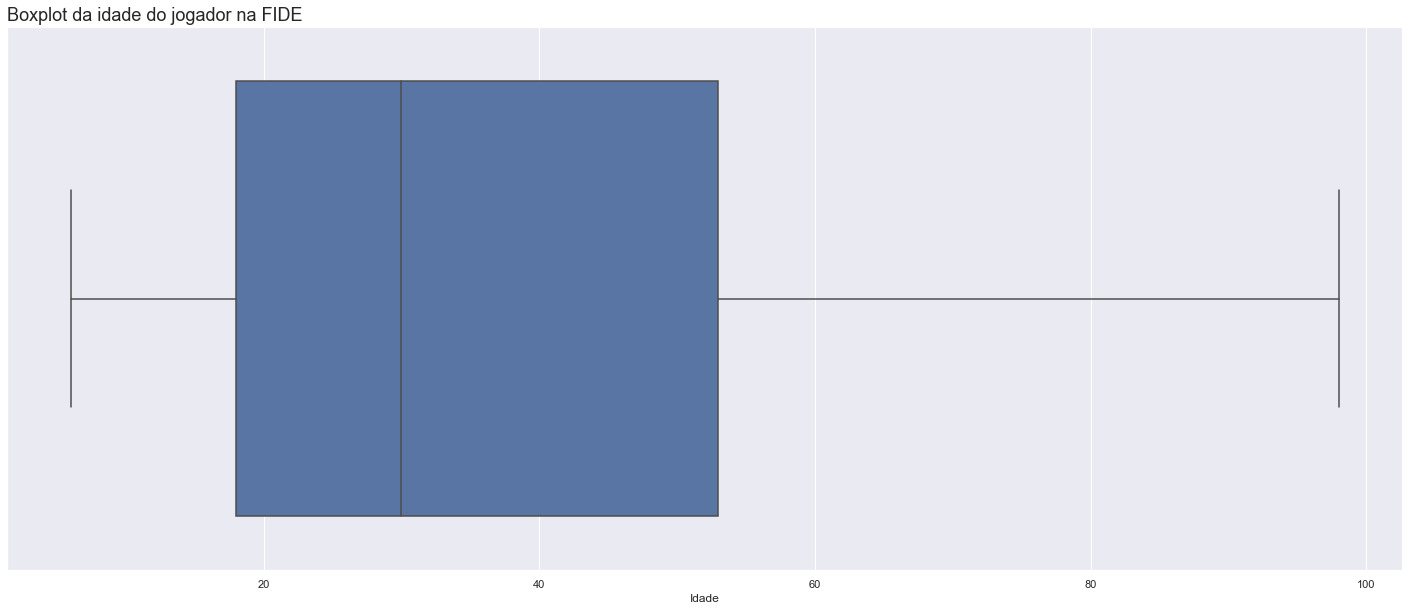

In [29]:
## Façamos novamente o boxplot das idades dos jogadores

ax = sns.boxplot(data=fide, x='Age')
ax.set_title('Boxplot da idade do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Idade')
ax.figure.set_size_inches(25,10)

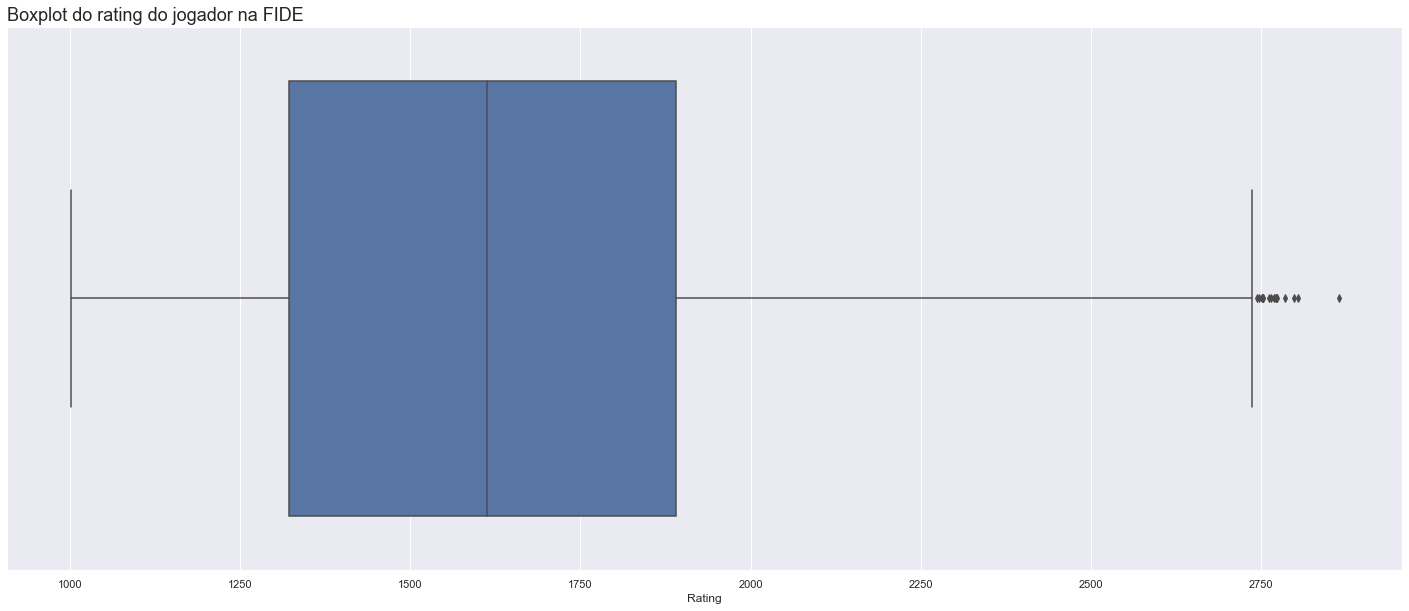

In [30]:
ax = sns.boxplot(data=fide, x='FIDE')
ax.set_title('Boxplot do rating do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

In [31]:
## Antes de mostrar o boxplot da coluna 'K-factor', notamos que ela está nomeada como ' K-factor', com um espaço antes do nome
## Vamos ajustar para facilitar na hora de chamar a coluna

fide.rename(columns={' K-factor':'K-factor'}, inplace=True)

C:\Users\PC\AppData\Local\Temp/ipykernel_7668/899726080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fide.rename(columns={' K-factor':'K-factor'}, inplace=True)


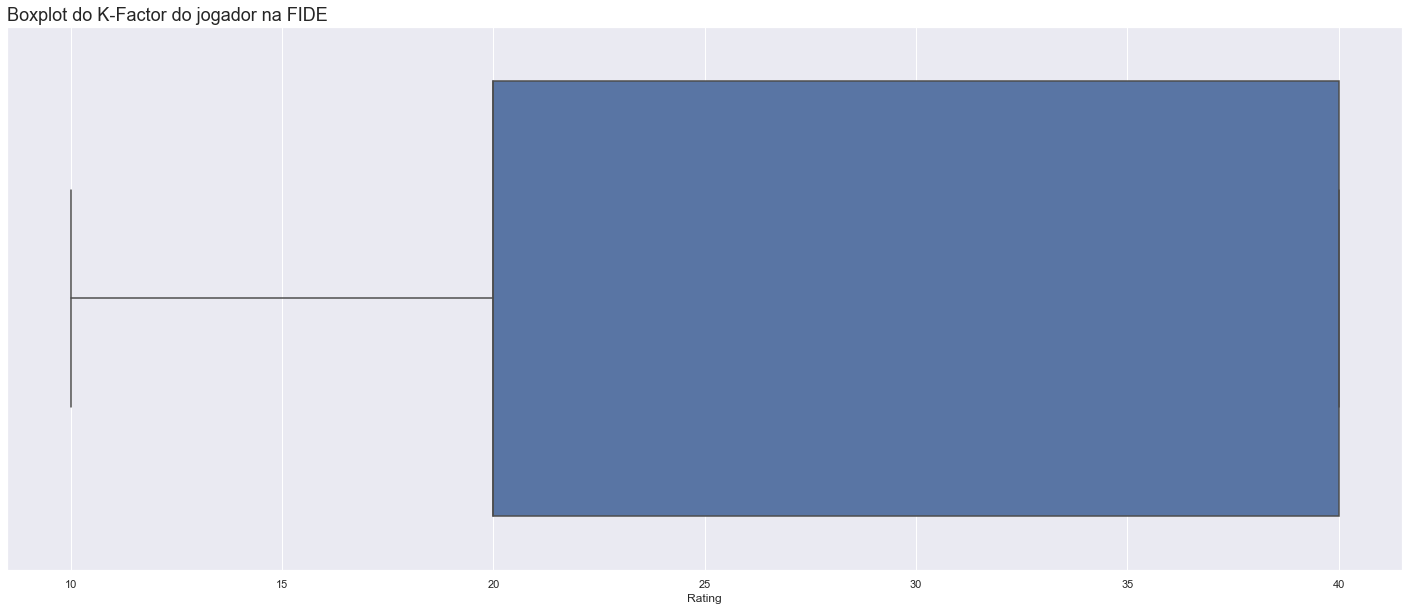

In [32]:
ax = sns.boxplot(data=fide, x='K-factor')
ax.set_title('Boxplot do K-Factor do jogador na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(25,10)

## #03 - Visualização de dados

### Gráfico 1: Vencedor da partida de xadrez de acordo com a cor de peça utilizada (lichess)

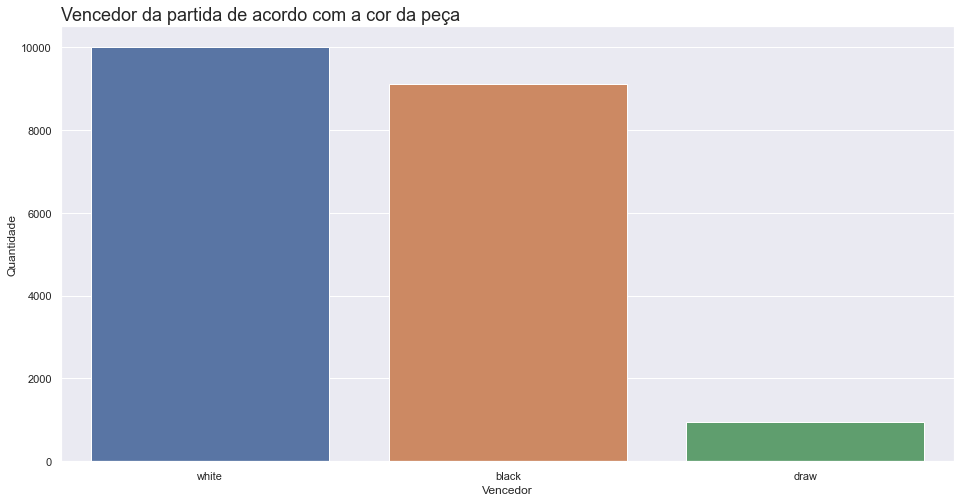

In [33]:
## No xadrez, o jogo sempre é iniciado pelo jogador de peças brancas
## Dizem que iniciar o jogo é vantajoso na disputa por espaço no tabuleiro
## Mas será que isso reflete no resultado da partida?


ax = sns.countplot(x='winner', data=lichess)
ax.set_title('Vencedor da partida de acordo com a cor da peça', loc='left', fontsize=18)
ax.set_xlabel('Vencedor')
ax.set_ylabel('Quantidade')
ax.figure.set_size_inches(16,8)

In [34]:
## Vejamos apenas os números:

lichess.winner.value_counts(normalize=True)*100

## É pequena, mas existe uma vantagem para as brancas e isso é convertido em vitórias

white    49.860405
black    45.403330
draw      4.736265
Name: winner, dtype: float64

### Gráfico 2: Vencedor da partida de xadrez de acordo com a abertura de jogo utilizada (lichess)

In [35]:
## Desde o início de uma partida de xadrez, os jogadores estão atentos às estratégias
## Jogadores com mais repertório no xadrez recorrem a certos movimentos iniciais conhecidos para construir o seu jogo
## Tais movimentos iniciais de uma partida são conhecidos como ABERTURAS

## Alguns autores chamam de aberturas apenas os movimentos iniciais das brancas, visto que são os jogadores de brancas os que abrem de fato o jogo
## Já os movimentos iniciais das pretas são chamados de DEFESAS, respondendo às aberturas das brancas

## No dataset do lichess, não há distinção entre aberturas e defesas e ambos são considerados aberturas

In [36]:
## Quais são as aberturas mais comuns nesse dataset?

top10_opening_name = lichess.opening_name.value_counts()[:10]
top10_opening_name

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: opening_name, dtype: int64

In [46]:
## Façamos uma query para separar a fatia do dataset contendo apenas as partidas com aberturas no top 10

top10_opening = lichess.query("opening_name in @top10_opening_name.index")
top10_opening

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
10,HgKLWPsz,False,1.503350e+12,1.503350e+12,39,mate,white,20+60,daniel_likes_chess,1381,anaissac,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Van't Kruijs Opening,1
12,HRti5mKv,False,1.503350e+12,1.503350e+12,60,resign,black,5+40,daniel_likes_chess,1381,roman12342005,1936,e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...,C00,French Defense: Knight Variation,3
21,QFCZwY1f,False,1.502950e+12,1.502950e+12,3,resign,white,30+60,shivangithegenius,1094,themannichreaction,1068,d4 e6 Nc3,A40,Horwitz Defense,2
22,5cgBygpI,False,1.502950e+12,1.502950e+12,17,resign,white,15+5,storm28rus,1500,shivangithegenius,1094,e4 c5 Bc4 Nf6 Nc3 d6 Nf3 g6 Ng5 e6 d3 Bg7 O-O ...,B20,Sicilian Defense: Bowdler Attack,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,Pl7THFmZ,False,1.501677e+12,1.501677e+12,36,resign,black,15+15,jamboger,1267,fuoconero,1253,d4 e6 Bf4 Nf6 e3 d6 c3 e5 Bg3 exd4 cxd4 Ne4 Bh...,A40,Horwitz Defense,2
20041,B4IEyQyb,True,1.500157e+12,1.500158e+12,58,mate,black,10+10,jamboger,1263,kevineclmans,1770,d4 d5 Bf4 Bf5 e3 Nf6 c3 e6 Nf3 Nh5 Bg5 f6 Bh4 ...,D00,Queen's Pawn Game: Mason Attack,3
20051,uMzb0TPC,True,1.499812e+12,1.499813e+12,58,mate,black,10+10,samael88,1237,jamboger,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3


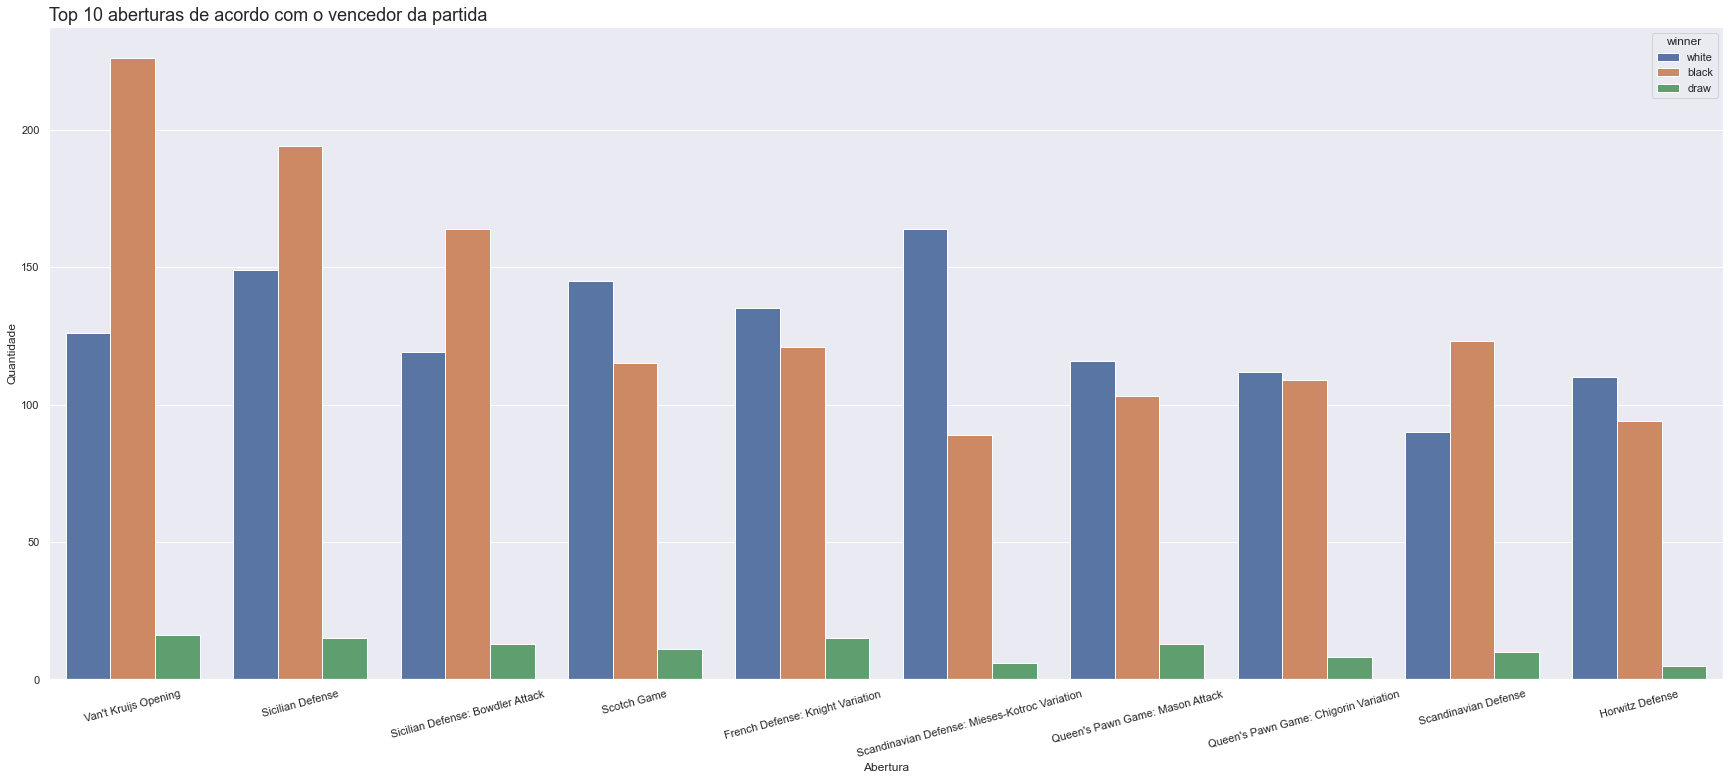

In [41]:
ax = sns.countplot(x="opening_name", hue='winner', data=top10_opening, order=top10_opening_name.index)
ax.set_title('Top 10 aberturas de acordo com o vencedor da partida', loc='left', fontsize=18)
ax.set_xlabel('Abertura')
ax.set_ylabel('Quantidade')
ax.figure.set_size_inches(30,12)
plt.xticks(rotation=15)
plt.show()

In [45]:
## Considerando as 10 aberturas mais frequentes, vemos que a vantagem é das pretas!

top10_opening.winner.value_counts(normalize=True)*100

black    49.263623
white    46.612666
draw      4.123711
Name: winner, dtype: float64

### Gráfico 3: Distribuição de frequência das idades dos jogadores (fide)

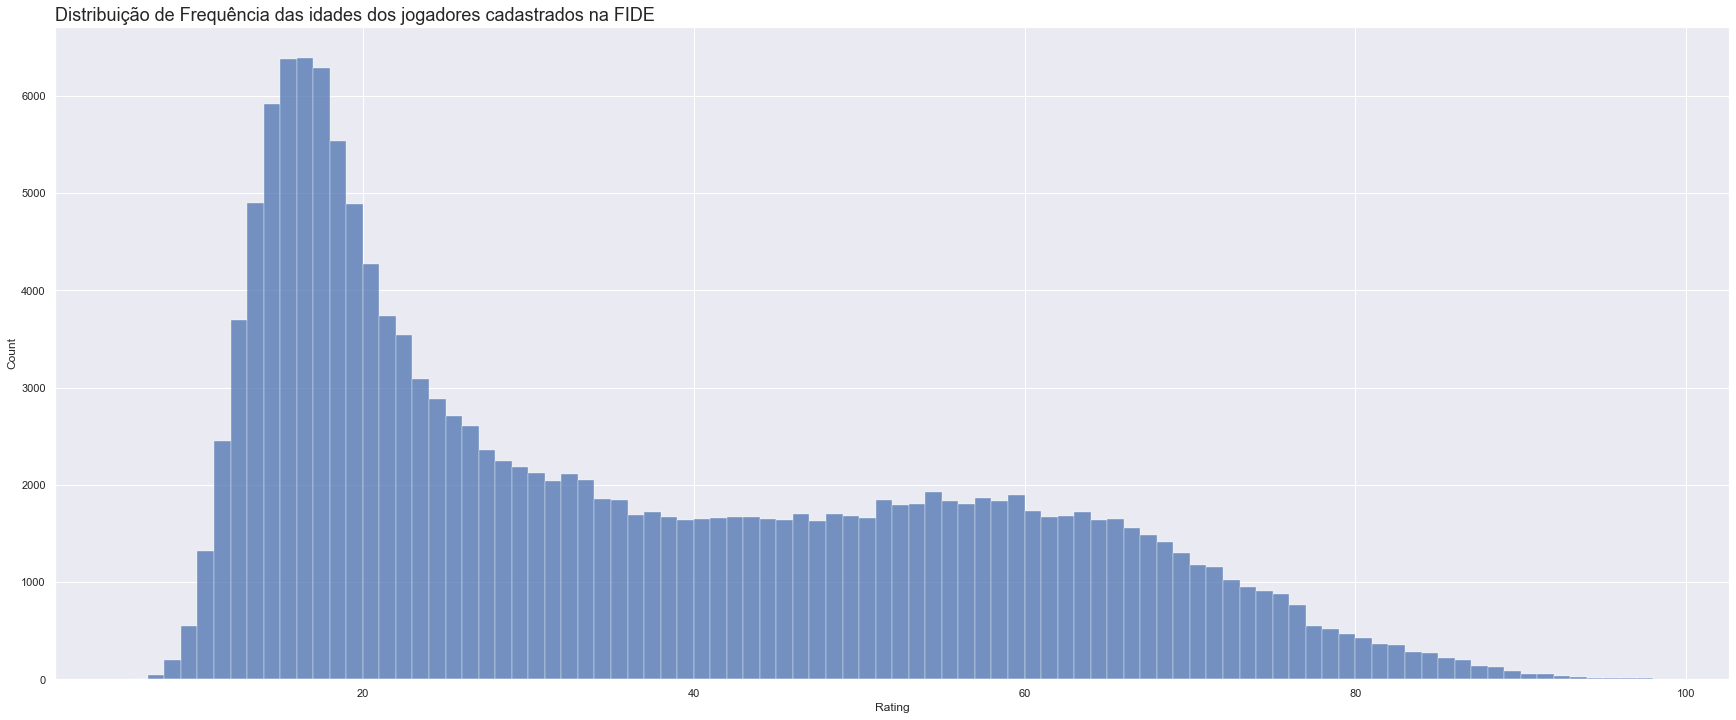

In [53]:
## Dentre os cadastros na FIDE, qual é a distribuição de frequência das idades dos jogadores?

ax = sns.histplot(data=fide, x='Age', binwidth=1)
ax.set_title('Distribuição de Frequência das idades dos jogadores cadastrados na FIDE', loc='left', fontsize=18)
ax.set_xlabel('Rating')
ax.figure.set_size_inches(30,12)